<h1 style="font-family:verdana;"> <center>G2Net Getting Started</center> </h1>

***

 
 ### <span style="font-family:verdana; word-spacing:1.5px;">  Task overview

<span style="font-family:verdana; word-spacing:1.5px;"> Finding consistent gravitational-wave signals is the aim of this repository. We'll create a model that is sensitive enough to distinguish between noisy data and the weak but persistent signals emitted by swiftly rotating neutron stars.
    
In this competition, we are given a training set for this competition that contains time-frequency data from two gravitational-wave interferometers (LIGO Hanford & LIGO Livingston). Each data sample has real or simulated noise, as well as perhaps a continuous simulated gravitational-wave signal (CW). Detecting the presence of a signal in the data is the task (target = 1).

A set of Short-time Fourier Transforms (SFTs) and corresponding GPS time stamps for each interferometer make up each sample. Since the interferometers are not always online, the SFTs are not always contiguous in time.


## Imports Libraries

In [1]:
import pandas as pd
import os
import numpy as np
from tqdm.notebook import tqdm

import seaborn as sns
sns.set_theme(style = 'darkgrid')
sns.set_palette('plasma')
import matplotlib.pyplot as plt

import h5py

import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML, display
display(HTML('<style>.font-family:verdana; word-spacing:1.5px;</style>'))

In [2]:
## Read files
## Base path
BASE_DIR = "/kaggle/input/g2net-detecting-continuous-gravitational-waves/"

## Train Path
train_path = os.path.join(BASE_DIR, 'train')
test_path = os.path.join(BASE_DIR, 'test')

files = [f for f in os.listdir(train_path) if f.endswith('.hdf5')]
files.sort()
files[:5]

['001121a05.hdf5',
 '004f23b2d.hdf5',
 '00a6db666.hdf5',
 '00f36a6ac.hdf5',
 '010a387db.hdf5']

In [3]:
## Training example with signal data path: cc561e4fc.hdf5 inside train_path
train_eg_with_signal = os.path.join(train_path, 'cc561e4fc.hdf5')

## Training example without signal data path: fb6db0d08.hdf5 inside train_path
train_eg_without_signal = os.path.join(train_path, 'fb6db0d08.hdf5')

# HDF5 

<span style="font-family:verdana; word-spacing:1.5px;"> The HDF5 format can be compared to a file system that is described and stored entirely within a single file. Consider the folders and files that are present on your computer. It's possible that you have a data directory with temperature information for various field sites. These temperature readings are taken every minute and are then compiled hourly, daily, and weekly. Similar to how you might organise files and folders on your computer, you can store a similar set of data inside one HDF5 file. However, in an HDF5 file, what we refer to on our computers as "directories" or "folders" are called groups and what we refer to on our computers as "files" are called datasets.

<span style="font-family:verdana; word-spacing:1.5px;"> HDF5 simplifies the file structure to include only two major types of object:
- <span style="font-family:verdana; word-spacing:1.5px;"> Group: An HDF5 file element that resembles a folder and may include other groups OR datasets.
- <span style="font-family:verdana; word-spacing:1.5px;"> Dataset: The information actually present in the HDF5 file. Sets of data are frequently (but not always) stored in the file as groups.

    
<span style="font-family:verdana; word-spacing:1.5px;"> The `h5py` package is a thin, pythonic wrapper around HDF5 we can use it to quickly load our data.

<div align = 'center'><img src= "https://cdn-images-1.medium.com/max/4984/1*BXG3eNq7xZGskaXmn53kvQ.png" alt ="Space" style='width: 800px;height 400px'>

##  <span style="font-family:verdana; word-spacing:1.5px;">  We can see the structure of the training and test data below:

- <span style="font-family:verdana; word-spacing:1.5px;">  `ID` is the top group of the HDF5 file and links the datapoint to it's label in the `train_labels` csv  (group)

- <span style="font-family:verdana; word-spacing:1.5px;">  `frequency_Hz`  lists the range of frequencies that the dectors measured (dataset)

- <span style="font-family:verdana; word-spacing:1.5px;">  The data for the LIGO Hanford decector are contained in "H1" (group)
    
    - <span style="font-family:verdana; word-spacing:1.5px;">  `SFTs` is the Short-time Fourier Transforms amplitudes for each timestamp at each frequency (dataset)
    - <span style="font-family:verdana; word-spacing:1.5px;"> `timestamps` contains the measurement's timestamps (dataset)

    
- <span style="font-family:verdana; word-spacing:1.5px;">  The data for the LIGO Livingston decector are contained in "L1" (group)
    
    - <span style="font-family:verdana; word-spacing:1.5px;">  `SFTs` is the Short-time Fourier Transforms amplitudes for each timestamp at each frequency (dataset)
    - <span style="font-family:verdana; word-spacing:1.5px;">  `timestamps` contains the measurement's timestamps (dataset)
    
<span style="font-family:verdana; word-spacing:1.5px;"> This structure can be visualised below 👇 

![](https://i.imgur.com/M6xfOri.png)

##  <span style="font-family:verdana; word-spacing:1.5px;"> Let's look at an example

In [4]:
with h5py.File(train_eg_with_signal, "r") as f:
    
    # get first object name/key; this is the data point ID
    ID_key = list(f.keys())[0]
    print(f"ID: {ID_key} \n")
    
    # Retrieve the Livingston decector data
    print(f"- {list(f[ID_key].keys())[1]}")
    L1_SFTs = f[ID_key]['L1']['SFTs']
    print(f"-- SFTs amplitudes: {L1_SFTs.shape}")
    L1_ts = f[ID_key]['L1']['timestamps_GPS']
    print(f"-- timestamps: {L1_ts.shape} \n")
    
    # Retrieve the Hanford decector data
    print(f"- {list(f[ID_key].keys())[0]}")
    H1_SFTs = f[ID_key]['H1']['SFTs']
    print(f"-- SFTs amplitudes: {H1_SFTs.shape}")
    H1_ts = f[ID_key]['H1']['timestamps_GPS']
    print(f"-- timestamps: {H1_ts.shape} \n")

    # Retrieve the frequency data
    freq_data = np.array(f[ID_key]['frequency_Hz'])
    print(f"- Frequency data: {freq_data.shape} \n")

ID: cc561e4fc 

- L1
-- SFTs amplitudes: (360, 4655)
-- timestamps: (4655,) 

- H1
-- SFTs amplitudes: (360, 4570)
-- timestamps: (4570,) 

- Frequency data: (360,) 



# Load in the meta data ⏳

In [5]:
train_labels = pd.read_csv(os.path.join(BASE_DIR, 'train_labels.csv'))
train_labels

id  target
0    001121a05       1
1    004f23b2d       1
2    00a6db666       1
3    00f36a6ac       1
4    010a387db       1
..         ...     ...
598  fe38dbe64       1
599  feafd0d16       1
600  feeca844e       1
601  ff5ad023f       1
602  ffa1d19c7       1

[603 rows x 2 columns]

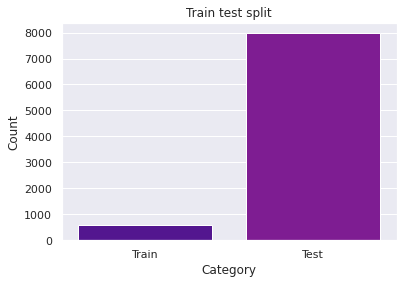

In [6]:
### Plot Train Test split ###

plt.figure(figsize=(6,4))
sns.barplot(['Train', 'Test'], [len(os.listdir(train_path)), len(os.listdir(test_path))]);
plt.title(f'Train test split', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

<span style="font-family:verdana; word-spacing:1.5px;">  This is a very unusual train test split for a kaggle competetion. Normally we would see at an 80:20 split, but here it is 1:16. The competition hosts are encouraging us to generate more data ourselves ([see discussion](https://www.kaggle.com/competitions/g2net-detecting-continuous-gravitational-waves/discussion/347052))

## <span style="font-family:verdana; word-spacing:1.5px;">  Labels
<span style="font-family:verdana; word-spacing:1.5px;">  Each data sample contains either **real or simulated noise** and possibly a **simulated continuous gravitational-wave signal** (CW). The task is to identify when a signal is present in the data (target=1)

<span style="font-family:verdana; word-spacing:1.5px;">  The file "target labels.csv" contains the target labels, which are either 0 if there are no gravitational waves present in the data or 1 if there are. (Note the presence of a few files with the suffix -1. The status of these files is currently unknown to physicists.)

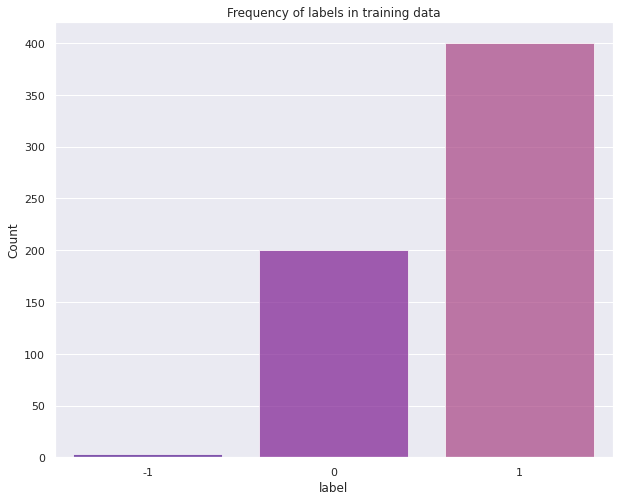

In [7]:
### Plot the distribution of labels ###
label_count  = train_labels['target'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(label_count.index, label_count.values, alpha=0.7)
plt.title(f'Frequency of labels in training data', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('label', fontsize=12)
plt.show()

In [8]:
def read_in_pandas(filename):
    filename = filename[:-5]
    
    f = h5py.File(
        f'../input/g2net-detecting-continuous-gravitational-waves/train/{filename}.hdf5', 'r'
    )[filename]
    
    frequencies = pd.Series(
        np.array(f['frequency_Hz']),
        name='frequency_Hz',
    )
    frequencies.index = 'f_' + frequencies.index.astype(str)
    
    H1_timestamp_numpy = np.array(f['H1']['timestamps_GPS'], dtype=np.float32)
    H1_timestamp = pd.Series(
        H1_timestamp_numpy,
        index=[f't_{i}' for i in range(len(H1_timestamp_numpy))],
        name='h1_timestamp'
    )
    H1_SFTs = pd.DataFrame(
        np.array(f['H1']['SFTs']),
        columns=H1_timestamp.index,
        index=frequencies
    )
    H1_SFTs.index.name = 'frequency'

    # ---- L1
    L1_timestamp_numpy = np.array(f['L1']['timestamps_GPS'], dtype=np.float32)
    L1_timestamp = pd.Series(
        L1_timestamp_numpy,
        index=[f't_{i}' for i in range(len(L1_timestamp_numpy))],
        name='l1_timestamp'
    )
    L1_SFTs = pd.DataFrame(
        np.array(f['L1']['SFTs']),
        columns=L1_timestamp.index,
        index=frequencies
    )
    L1_SFTs.index.name = 'frequency'
    
    return(
        H1_SFTs, H1_timestamp,
        L1_SFTs, L1_timestamp,
        frequencies
    )

H1_SFTs, H1_timestamp, L1_SFTs, L1_timestamp, frequencies = read_in_pandas('001121a05.hdf5')
print('Shapes:\n')
print('H1_SFTs    ', H1_SFTs.shape, '   H1_timestamp', H1_timestamp.shape)
print('L1_SFTs    ', L1_SFTs.shape, '   L1_timestamp', L1_timestamp.shape)
print('Frequencies', frequencies.shape)

Shapes:

H1_SFTs     (360, 4612)    H1_timestamp (4612,)
L1_SFTs     (360, 4653)    L1_timestamp (4653,)
Frequencies (360,)


### H1 EDA
The first thing we notice is that not all files have the same timestamps, nor the same frequency range.

In [9]:
for filename in files[:5]:
    H1_SFTs, H1_timestamp, _, _, frequencies = read_in_pandas(filename)
    print('-'*25)
    print(filename)
    print('H1_SFTs     ', H1_SFTs.shape, '   H1_timestamp', H1_timestamp.shape)
    print('Frequencies ', 'max:',frequencies.max().round(3),  '   min:',frequencies.min().round(3))
    print()

-------------------------
001121a05.hdf5
H1_SFTs      (360, 4612)    H1_timestamp (4612,)
Frequencies  max: 53.707    min: 53.508

-------------------------
004f23b2d.hdf5
H1_SFTs      (360, 4546)    H1_timestamp (4546,)
Frequencies  max: 329.219    min: 329.02

-------------------------
00a6db666.hdf5
H1_SFTs      (360, 4525)    H1_timestamp (4525,)
Frequencies  max: 213.388    min: 213.188

-------------------------
00f36a6ac.hdf5
H1_SFTs      (360, 4609)    H1_timestamp (4609,)
Frequencies  max: 453.459    min: 453.259

-------------------------
010a387db.hdf5
H1_SFTs      (360, 4624)    H1_timestamp (4624,)
Frequencies  max: 232.083    min: 231.884



## H1 Spectograms

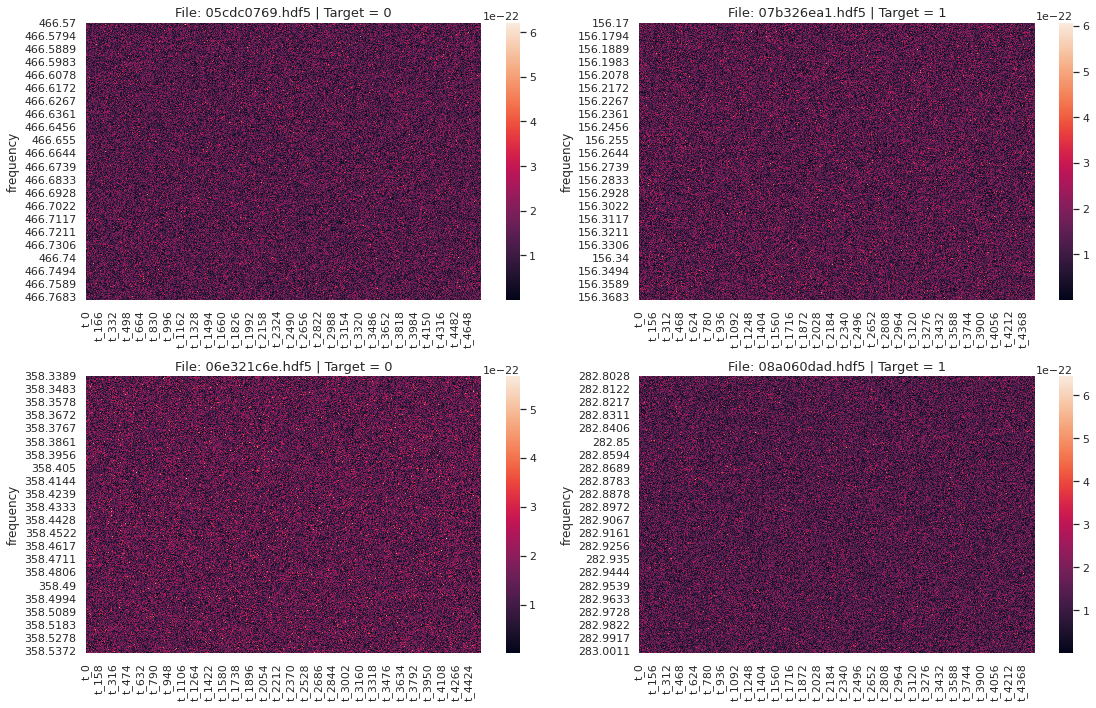

In [10]:
files = [
    #target 0 #       target 1         
    '05cdc0769.hdf5', '07b326ea1.hdf5', 
    '06e321c6e.hdf5', '08a060dad.hdf5'
]

fig, ax = plt.subplots(2, 2, figsize=(16, 10))
ax = ax.flatten()
for i, filename in enumerate(files):
    H1_SFTs, H1_timestamp, _, _, frequencies = read_in_pandas(filename)
    H1_SFTs = H1_SFTs.abs() #norm of a complex number
    H1_SFTs.index = np.round(H1_SFTs.index, 4)
    sns.heatmap(H1_SFTs, ax=ax[i])
    ax[i].set_title(f'File: {filename} | Target = {i%2}', fontsize=13)
    
plt.tight_layout()

### H1 Fourier Transform

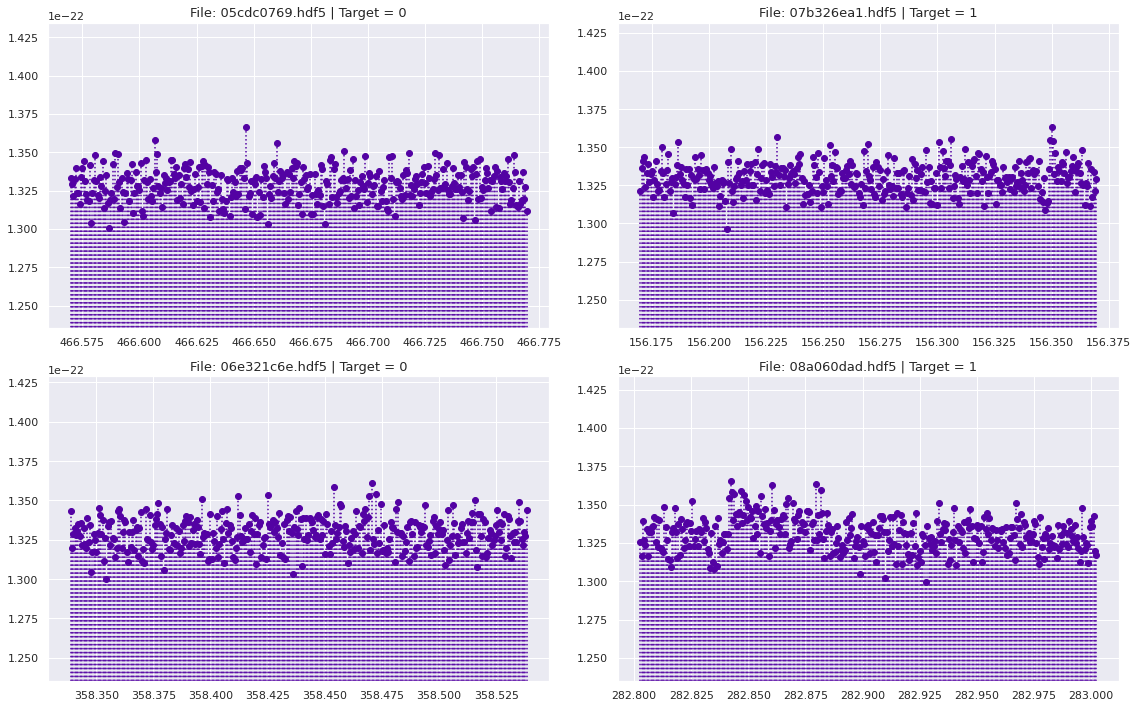

In [11]:
files = [
    #target 0 #       target 1         
    '05cdc0769.hdf5', '07b326ea1.hdf5', 
    '06e321c6e.hdf5', '08a060dad.hdf5'
]

fig, ax = plt.subplots(2, 2, figsize=(16, 10))
ax = ax.flatten()
for i, filename in enumerate(files):
    H1_SFTs, H1_timestamp, _, _, frequencies = read_in_pandas(filename)
    to_plot = H1_SFTs.abs().mean(axis=1)
    ax[i].stem(to_plot.index, to_plot, linefmt=':')
    ax[i].set_ylim(to_plot.min()*0.95, to_plot.max()*1.05)
    ax[i].set_title(f'File: {filename} | Target = {i%2}', fontsize=13)
    
plt.tight_layout()

## L1 EDA

In [12]:
for filename in files[:5]:
    _, _, L1_SFTs, L1_timestamp, frequencies = read_in_pandas(filename)
    print('-'*25)
    print(filename)
    print('L1_SFTs     ', L1_SFTs.shape, '   L1_timestamp', L1_timestamp.shape)
    print('Frequencies ', 'max:',frequencies.max().round(3),  '   min:',frequencies.min().round(3))
    print()

-------------------------
05cdc0769.hdf5
L1_SFTs      (360, 4658)    L1_timestamp (4658,)
Frequencies  max: 466.769    min: 466.57

-------------------------
07b326ea1.hdf5
L1_SFTs      (360, 4635)    L1_timestamp (4635,)
Frequencies  max: 156.369    min: 156.17

-------------------------
06e321c6e.hdf5
L1_SFTs      (360, 4556)    L1_timestamp (4556,)
Frequencies  max: 358.538    min: 358.339

-------------------------
08a060dad.hdf5
L1_SFTs      (360, 4559)    L1_timestamp (4559,)
Frequencies  max: 283.002    min: 282.803



## L1 Spectograms

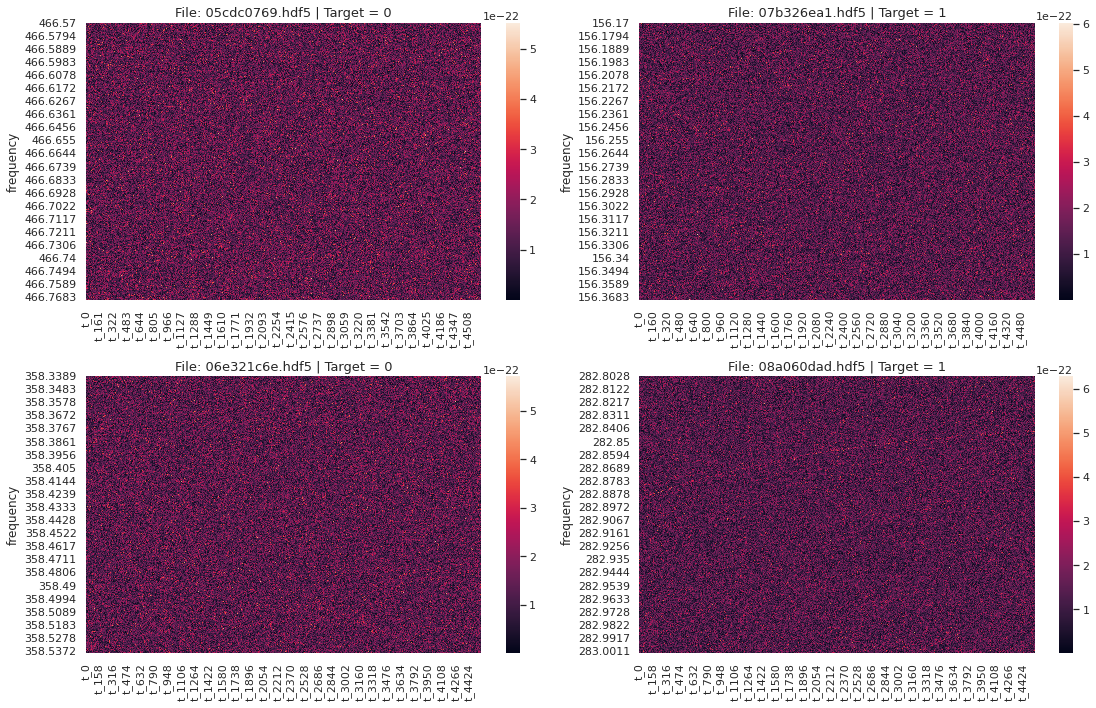

In [13]:
files = [
    #target 0 #       target 1         
    '05cdc0769.hdf5', '07b326ea1.hdf5', 
    '06e321c6e.hdf5', '08a060dad.hdf5'
]

fig, ax = plt.subplots(2, 2, figsize=(16, 10))
ax = ax.flatten()
for i, filename in enumerate(files):
    _, _, L1_SFTs, L1_timestamp, frequencies = read_in_pandas(filename)
    L1_SFTs = L1_SFTs.abs() # norm of a complex number
    L1_SFTs.index = np.round(L1_SFTs.index, 4)
    sns.heatmap(L1_SFTs, ax=ax[i])
    ax[i].set_title(f'File: {filename} | Target = {i%2}', fontsize=13)
    
plt.tight_layout()

### L1 Fourier Transform

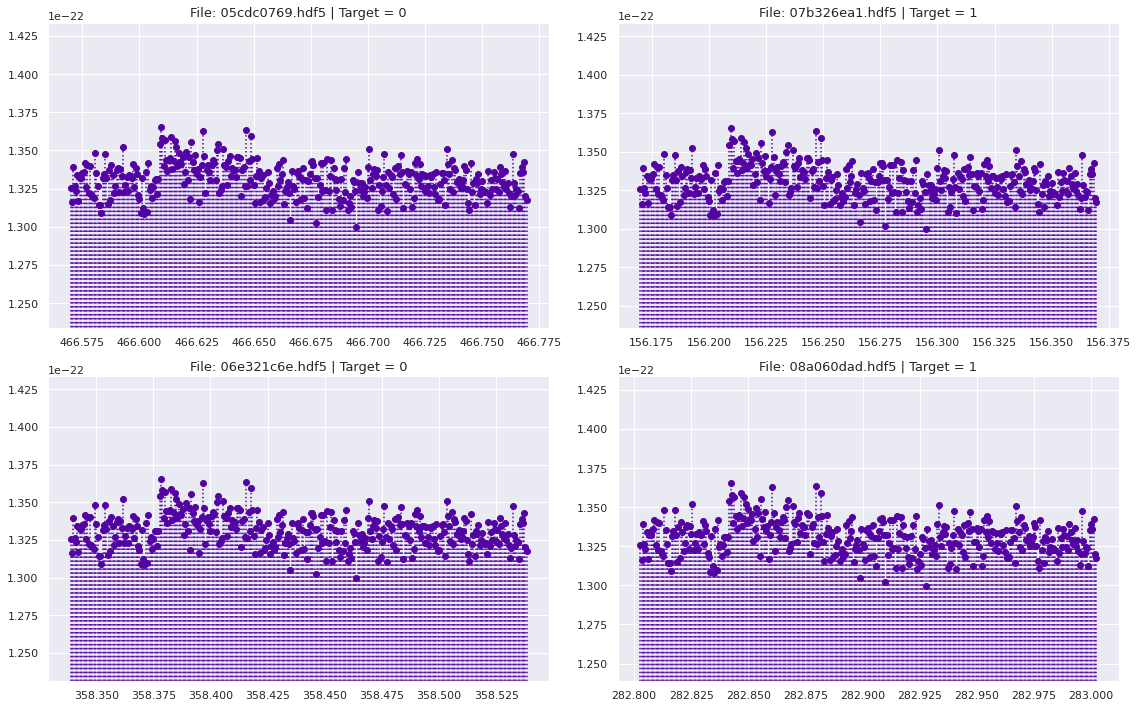

In [14]:
files = [
    #target 0 #       target 1         
    '05cdc0769.hdf5', '07b326ea1.hdf5', 
    '06e321c6e.hdf5', '08a060dad.hdf5'
]

fig, ax = plt.subplots(2, 2, figsize=(16, 10))
ax = ax.flatten()
for i, filename in enumerate(files):
    _, _, L1_SFTs, L1_timestamp, frequencies = read_in_pandas(filename)
    L1_SFTs = L1_SFTs.abs().mean(axis=1)
    ax[i].stem(L1_SFTs.index, to_plot, linefmt=':')
    ax[i].set_ylim(L1_SFTs.min()*0.95, to_plot.max()*1.05)
    ax[i].set_title(f'File: {filename} | Target = {i%2}', fontsize=13)
    
plt.tight_layout()

# Timestamp analysis ⏱

Since the continuous gravitational wave is simulated I am not sure how the length of it is determined (it seems to be hard coded in the [generating signals nb](https://github.com/PyFstat/PyFstat/blob/ec86602bb2f93238492a7242ad90995f6654eab7/examples/tutorials/1_generating_signals.ipynb)). As a result, I assume that the timestamp data is relatively meaningless... for completness I will include a few plots :)

In [15]:
### Helper functions to extract data ###

def extract_data_from_hdf5(path, labels):
    '''
    Extracts data from hdf5 file and puts it into a dict. It also adds the label
    '''
    
    data = {}
    
    with h5py.File(path, "r") as f:
        
        # Get the ID key
        ID_key = list(f.keys())[0]

        # Retrieve the frequency data
        data['freq'] = np.array(f[ID_key]['frequency_Hz'])

        # Retrieve the Livingston decector data
        data['L1_SFTs_amplitudes'] = np.array(f[ID_key]['L1']['SFTs'])
        data['L1_ts'] = np.array(f[ID_key]['L1']['timestamps_GPS'])

        # Retrieve the Livingston decector data
        data['H1_SFTs_amplitudes'] = np.array(f[ID_key]['H1']['SFTs'])
        data['H1_ts'] = np.array(f[ID_key]['H1']['timestamps_GPS'])
        
        # Get label from training labels if in training set
        data['label'] = labels.loc[labels.id==ID_key].target.item()
        
    return data



In [16]:
## Extract timestamp data from training data

H1_timestamps, L1_timestamps, start_diff, labels, freq = ([] for i in range(5))

for p in tqdm(os.listdir(train_path), total=len(os.listdir(train_path))):
    id_ = p.split('.')[0]
    labels.append(train_labels.loc[train_labels.id==id_].target.item())
    data = extract_data_from_hdf5(os.path.join(train_path, p), train_labels)
    L1_timestamps.append(data['L1_ts'])
    H1_timestamps.append(data['H1_ts'])
    start_diff.append(data['L1_ts'][0] - data['H1_ts'][0])
    freq.append(data['freq'])

  0%|          | 0/603 [00:00<?, ?it/s]

In [17]:
df = pd.DataFrame({'label':labels, 'L1_timestamp_length':[len(i) for i in L1_timestamps], 'H1_timestamp_length':[len(i) for i in H1_timestamps], 'Differnce in start time between detectors':start_diff})
df = df[df.label!=-1]

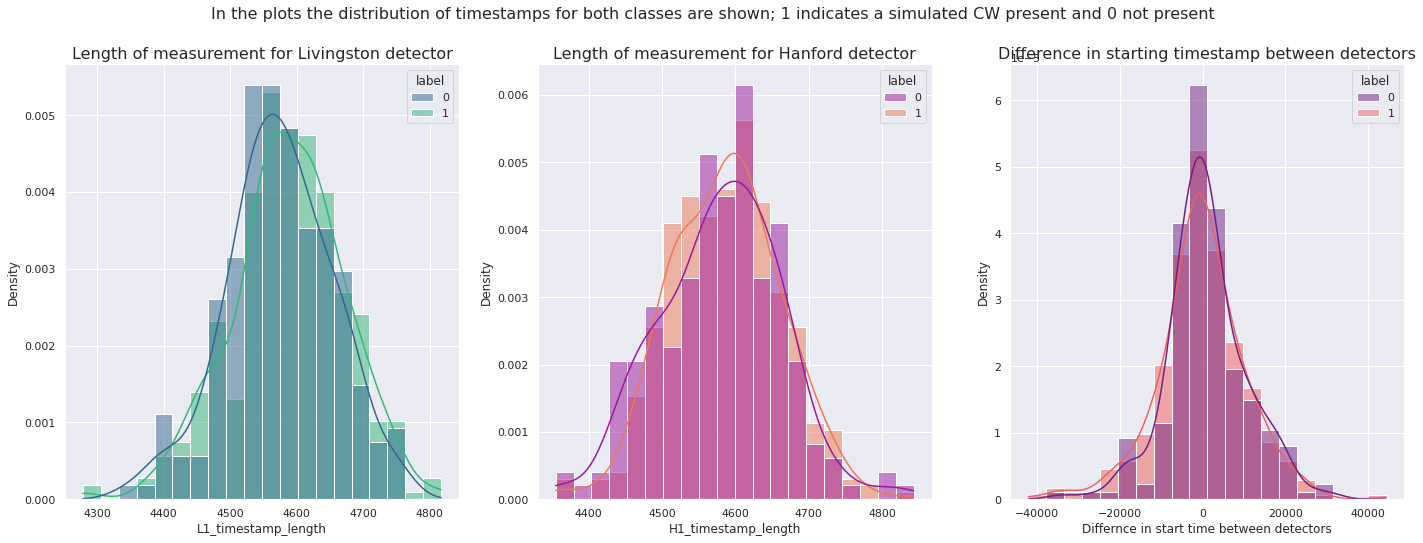

In [18]:
sns.set_theme()

fig, ax = plt.subplots(1,3, figsize=(24,8))
fig.suptitle(f"In the plots the distribution of timestamps for both classes are shown; 1 indicates a simulated CW present and 0 not present", fontsize=16)
sns.histplot(
        df, x="L1_timestamp_length", hue="label",
        stat="density", common_norm=False, bins=20, ax=ax[0], kde=True, palette="viridis").set_title('Length of measurement for Livingston detector', fontsize=16);

sns.histplot(
        df, x="H1_timestamp_length", hue="label",
        stat="density", common_norm=False, bins=20, ax=ax[1], kde=True, palette="plasma").set_title('Length of measurement for Hanford detector', fontsize=16);

sns.histplot(
        df, x="Differnce in start time between detectors", hue="label",
        stat="density", common_norm=False, bins=20, ax=ax[2], kde=True, palette="magma").set_title('Difference in starting timestamp between detectors', fontsize=16);

# Frequency analysis 📳

Do the detectors measure the same range of frequencies each time? No. The range varies but the minimum freq measured is ~50 Hz and the maximum is ~498 Hz

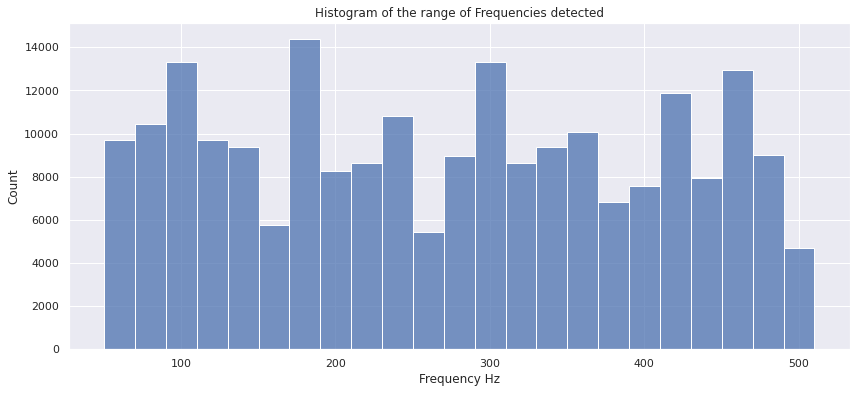

In [19]:
plt.figure(figsize=(14,6))
sns.histplot(x=list(np.hstack(freq)), binwidth=20, palette="plasma")
plt.title('Histogram of the range of Frequencies detected');
plt.xlabel('Frequency Hz')
plt.show()

## References
 - [[G2Net] Understand the Data](https://www.kaggle.com/code/siddhantsingh1/g2net-understand-the-data)
 - [G2Net: EDA That Gives You insights](https://www.kaggle.com/code/siddhantsingh1/g2net-eda-that-gives-you-insights)
 - [G2Net Getting Started + EDA ](https://www.kaggle.com/code/edwardcrookenden/g2net-getting-started-eda)

## End of the Notebook